In [46]:
import numpy as np
import BiasVarv2 as bv
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys
sys.path.append("..")
from LeastSquare import LeastSquare as LS
from LinearRegression2 import LinearRegression2 as LR


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})


In [47]:
def mse(a, b):
    return np.round(np.mean((a-b)**2), 5)

In [61]:
f = lambda x: x**2 + 0.25*x + 0.5
fx = 'x**2 + 0.25*x + 0.5'

In [62]:
n_res = 1000
x = np.linspace(-5, 5, n_res)
y = f(x)

In [63]:
num_sample = 10

In [69]:
x_sample = np.random.choice(x, num_sample)
y_sample = f(x_sample) + np.random.randn(num_sample)

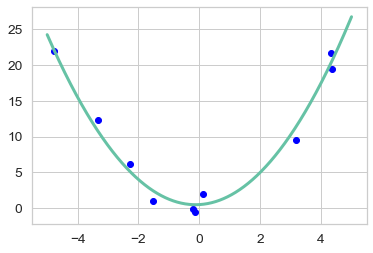

In [70]:
plt.plot(x, y)
plt.scatter(x_sample, y_sample, color='blue')

In [71]:
degree = np.arange(2, 10)

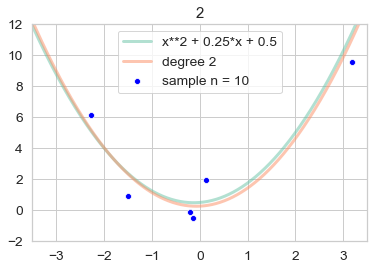

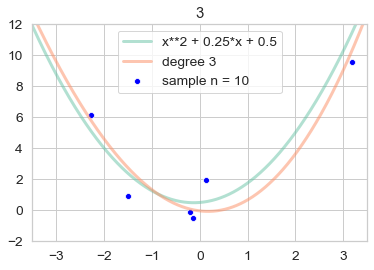

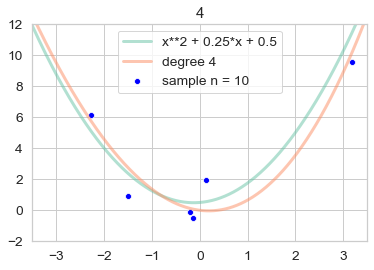

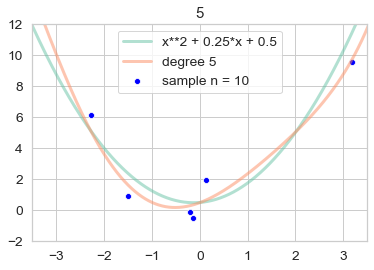

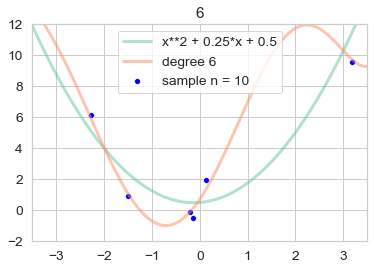

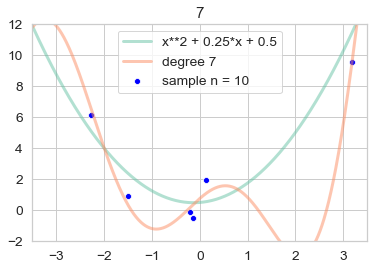

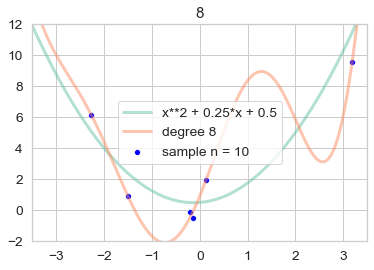

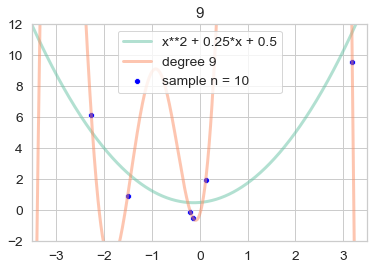

In [72]:
model_coef = []
model_intercept = []
e_out = []
e_in = []

for i in degree:
    polynomial_features= PolynomialFeatures(degree=i)
    x_sample_poly = polynomial_features.fit_transform(x_sample[:, np.newaxis])
    model = LinearRegression()
    model.fit(x_sample_poly, y_sample[:, np.newaxis])
    model_coef.append(model.coef_)
    model_intercept.append(model.intercept_)
    x_poly = polynomial_features.fit_transform(x[:, np.newaxis])
    y_predict = model.predict(x_poly)
    
    eout = mse(y_predict, y)
    e_out.append(eout)
    ein = mse(model.predict(x_sample_poly), y_sample)
    e_in.append(ein)
    
    fig = plt.figure()
    plt.title(f'{i}')
    sns.lineplot(x, y, alpha=0.5, label=fx)
    sns.lineplot(x, y_predict.flatten(), alpha=0.5, label=f'degree {i}')
    sns.scatterplot(x_sample, y_sample, label=f'sample n = {num_sample}', color='blue')
    plt.axis([-3.5, 3.5, -2, 12])

Text(0, 0.5, 'error')

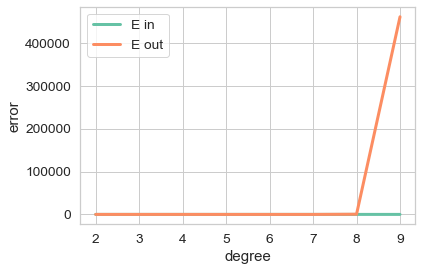

In [68]:
sns.lineplot(degree, e_in, label='E in')
sns.lineplot(degree, e_out, label='E out')
plt.xlabel('degree')
plt.ylabel('error')

In [56]:
degrees = [2, 4, 6, 8, 10]

In [57]:
sample_size = [2] + list(range(5, 50, 5))

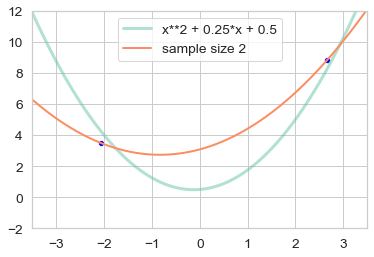

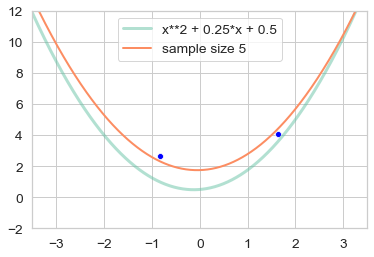

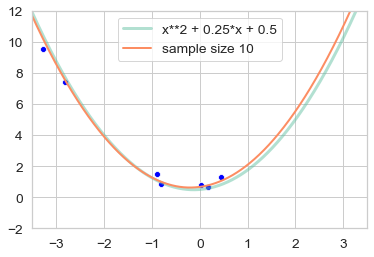

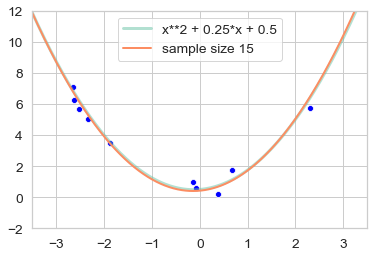

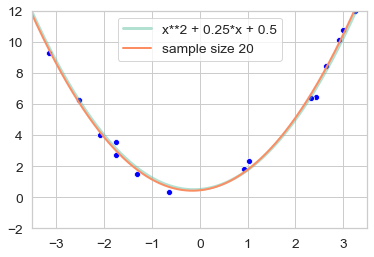

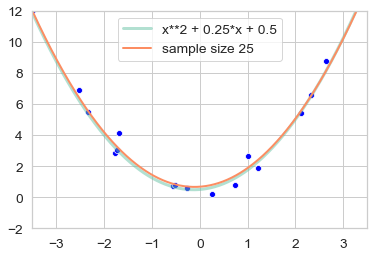

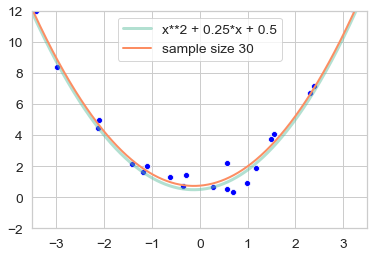

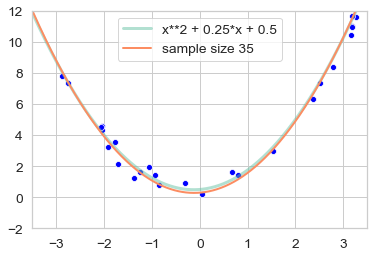

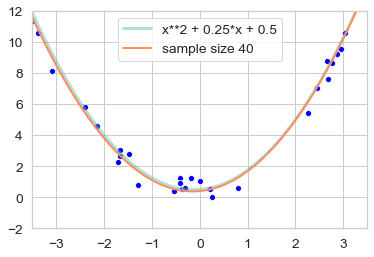

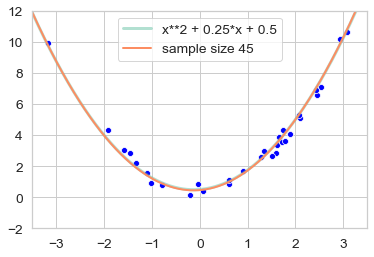

In [58]:
degree = 2

e_out = []
e_in = []

for i in sample_size:
    x_sample = np.random.choice(x, i)
    y_sample= f(x_sample) + np.random.randn(i)/2
    # model
    polynomial_features= PolynomialFeatures(degree=degree)
    x_sample_poly = polynomial_features.fit_transform(x_sample[:, np.newaxis])
    model = LinearRegression()
    model.fit(x_sample_poly, y_sample[:, np.newaxis])
    model_coef.append(model.coef_)
    model_intercept.append(model.intercept_)
    x_poly = polynomial_features.fit_transform(x[:, np.newaxis])
    y_predict = model.predict(x_poly)
    eout = mse(y_predict, y)
    e_out.append(eout)
    ein = mse(model.predict(x_sample_poly), y_sample)
    e_in.append(ein)
    fig = plt.figure()
    sns.lineplot(x, y, alpha=0.5, label=fx)
    sns.scatterplot(x_sample, y_sample, color='blue')
    sns.lineplot(x, y_predict.flatten(), label=f'sample size {i}', alpha=1, linewidth=2)
    plt.axis([-3.5, 3.5, -2, 12])

Text(0, 0.5, 'error')

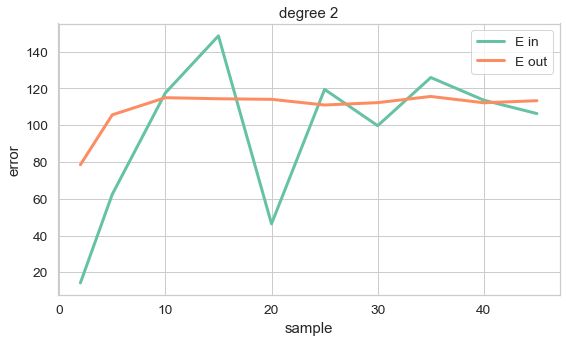

In [59]:
fig = plt.figure(figsize=(9,5))
sns.lineplot(sample_size, e_in, label='E in')
sns.lineplot(sample_size, e_out, label='E out')
plt.title(f'degree {degree}')
plt.xlabel('sample')
plt.ylabel('error')

In [79]:
np.round(model_coef[6], 5).tolist()

[[0.0,
  7.53168,
  3.18338,
  -2.80976,
  -0.83359,
  0.28874,
  0.08547,
  -0.00862,
  -0.00249]]